# Part II - (Exploration des données du système  Ford Gobike)
## by (OUILY Hamed Joseph)

## Investigation Overview

>  Dans cette enquête, je voulus examiner les caractéristiques qui peuvent influencer la durée d'un trajet du système Ford Gobike. La caractéristiques étudiées sont les jours, heures, sexe et type d'utilisateur.

## Dataset Overview
> Il donnait était constitué de 183412 trajets individuels du système. Pendant, la préparation des données, des lignes ont étés supprimer pour des raisons de valeurs manquantes dont on n'avait aucun moyen de reconstituer. J'ai fait l'analyse avec  174952 informations de trajets. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_gobike_df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
ford_gobike_df.dropna(inplace=True)

In [4]:
time = ['start_time','end_time']
for t in time:
    ford_gobike_df[t] = pd.to_datetime(ford_gobike_df[t])

In [5]:
ford_gobike_df['heure'] = ford_gobike_df.start_time.dt.hour.astype(str)
ford_gobike_df['jour'] = ford_gobike_df.start_time.dt.day_of_week.astype(int)

In [6]:
# converstion de jour pour mieux comprendre
jour = ['lun', 'mar', 'mer','jeu','ven','sam','dim']
ford_gobike_df['jour'] = ford_gobike_df['jour'].apply(lambda x:jour[x])

In [7]:
ford_gobike_df['age'] = 2019 - ford_gobike_df.member_birth_year

In [8]:
categories = ['start_station_name','end_station_name','user_type','bike_share_for_all_trip','member_gender']
for c in categories:
    ford_gobike_df[c] = ford_gobike_df[c].astype('category')

In [9]:
heure = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']
ordinale = {
    'jour':jour,
    'heure':heure
}
for i in ordinale:
    categorie = pd.api.types.CategoricalDtype(ordered=True,categories = ordinale[i] )
    ford_gobike_df[i] = ford_gobike_df[i].astype(categorie)

In [10]:
ford_gobike_df['duration_min'] = ford_gobike_df.duration_sec/60

In [11]:
# Suppression de valeur abérantes
out = (ford_gobike_df.age>75)| (ford_gobike_df.duration_min>150)
ford_gobike_df = ford_gobike_df[-out]

## Distrubution de la durée des trajets

> La répartition des durées a été fortement faussée vers la droite, les données ont été converties en minutes pour une meilleure compréhension. Et après une transformation logarithmique de l'échelle, la distribution des prix a une distribution très proche d'une distribution normale avec un pic pour les trajets de 10 à 20 minutes.

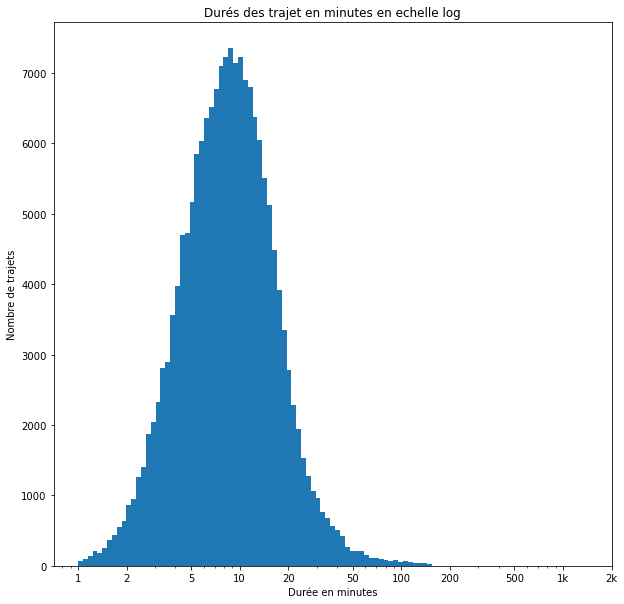

In [12]:
xticks = [1,2,5,10,20,50,100,200,500,1000,2000]
labels = [1,2,5,10,20,50,100,200,500,'1k','2k']
binslog = 10**np.arange(0, 3+0.03,0.03)

plt.figure(figsize=[10,10])
plt.hist(data=ford_gobike_df,x='duration_min',bins=binslog);
plt.title('Durés des trajet en minutes en echelle log')
plt.xscale('log')
plt.xticks(xticks,labels)
plt.xlabel('Durée en minutes')
plt.ylabel('Nombre de trajets');

## Repartitions de ages en années

> La distribution des âges est aussi une distribution asymétrique. Avec une transformation asymétrique, on voit que là nous avons beaucoup de trajet des personnes dont l'âge est compris entre 30 et 40 ans.

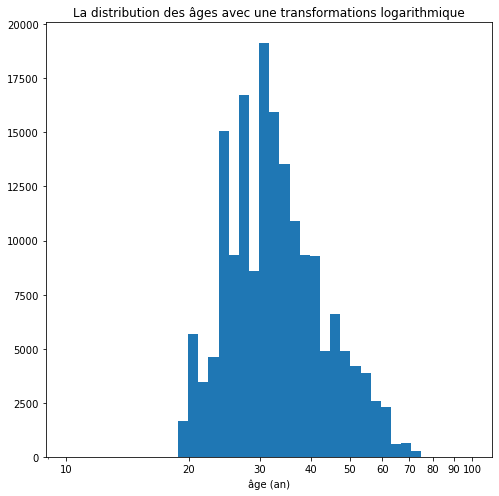

In [13]:
xticks = [10,20,30,40,50,60,70,80,90,100]
labels = ['{}'.format(i) for i in xticks]
binsize =0.025
plt.figure(figsize=[8,8])
bins = 10**np.arange(1,2+binsize,binsize)
plt.hist(data = ford_gobike_df, x='age',bins=bins)
plt.title('La distribution des âges avec une transformations logarithmique')
plt.xscale('log')
plt.xticks(xticks,labels)
plt.xlabel('âge (an)');

## Nuages des points de la durée par rapport à l'âge

> Le tracer des durées de trajets et l'âge sur une échelle logarithmique semblait montrer qu'il n'y a pas de relation linéaire entre ses deux caractéristiques.

In [14]:
samples = np.random.choice(ford_gobike_df.shape[0], 500, replace = False)
samples_df = ford_gobike_df.sample(500, replace=True)

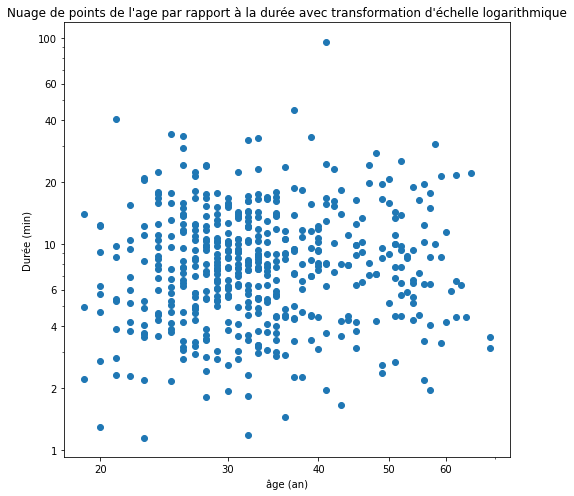

In [15]:
plt.figure(figsize=(8,8))

plt.scatter(data=samples_df, x='age', y='duration_min')

yticks = [1,2,4,6,10,20,40,60,100]
ylabels = ['{}'.format(i) for i in yticks]
xticks = [20,30,40,50,60]
xlabels = ['{}'.format(i) for i in xticks]

plt.xscale('log')
plt.yscale('log')

plt.xticks(xticks,xlabels)
plt.yticks(yticks,ylabels)
plt.title("Nuage de points de l'age par rapport à la durée avec transformation d'échelle logarithmique")
plt.xlabel('âge (an)')
plt.ylabel('Durée (min)');

## La durée et l'age des trajets par rapport aux autres variable caratéristique.

> La répartition des âges et des durées sont identiques à tout moment de la journée et quel que soit le jour de la semaine. Les clientes non abonnées effectuent plus les longs trajets et sont les plus âgés. Les femmes ont effectué plus de longs trajets et sont un peu moins âgées que les hommes.

In [16]:
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return 10**x

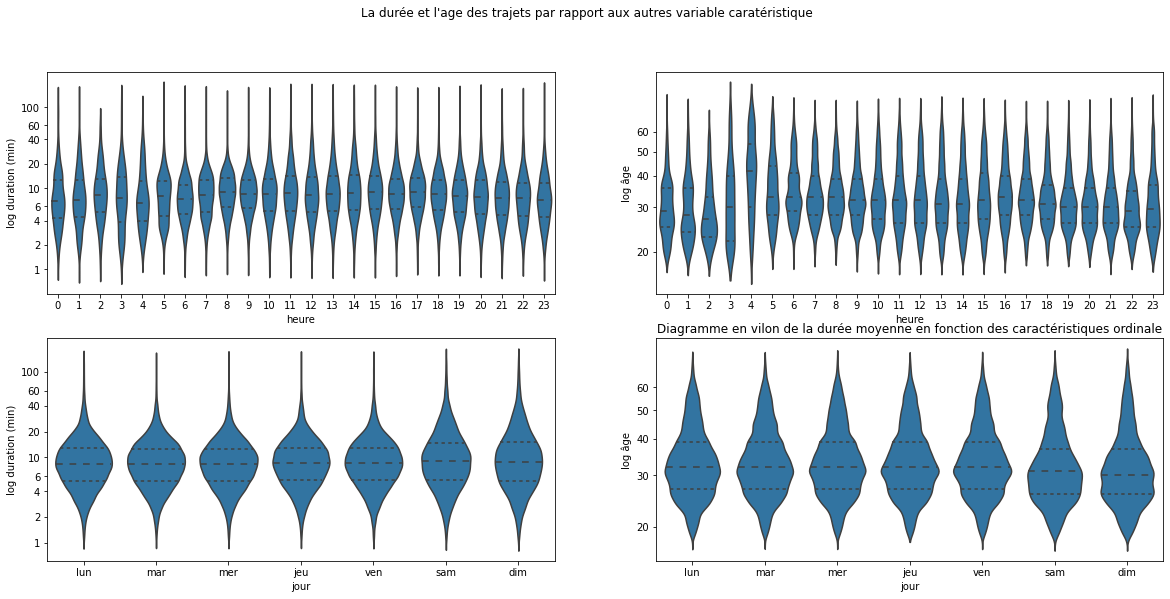

In [17]:
ford_gobike_df['log_duration'] = ford_gobike_df.duration_min.apply(log_trans)
ford_gobike_df['log_age'] = ford_gobike_df.age.apply(log_trans)


categoric_vars = ['heure','jour']
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(ncols = 2, nrows = len(categoric_vars) , figsize = [20,9])
plt.title('Diagramme en vilon de la durée moyenne en fonction des caractéristiques ordinale')

ylabels = ['{}'.format(i) for i in yticks]
xticks = [20,30,40,50,60]
xlabels = ['{}'.format(i) for i in xticks]

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data=ford_gobike_df, x=var, y='log_duration', color=base_color, inner='quartile', ax=ax[i,0])
    ax[i,0].set_yticks(log_trans(np.array([1,2,4,6,10,20,40,60,100])))
    ax[i,0].set_yticklabels([1,2,4,6,10,20,40,60,100])
    ax[i,0].set_ylabel('log duration (min)')
    sb.violinplot(data=ford_gobike_df, x=var, y='log_age', color=base_color, inner='quartile', ax=ax[i,1])
    ax[i,1].set_yticks(log_trans(np.array([20,30,40,50,60])))
    ax[i,1].set_yticklabels([20,30,40,50,60])
    ax[i,1].set_ylabel('log âge')

fig.suptitle("La durée et l'age des trajets par rapport aux autres variable caratéristique") 
plt.show()

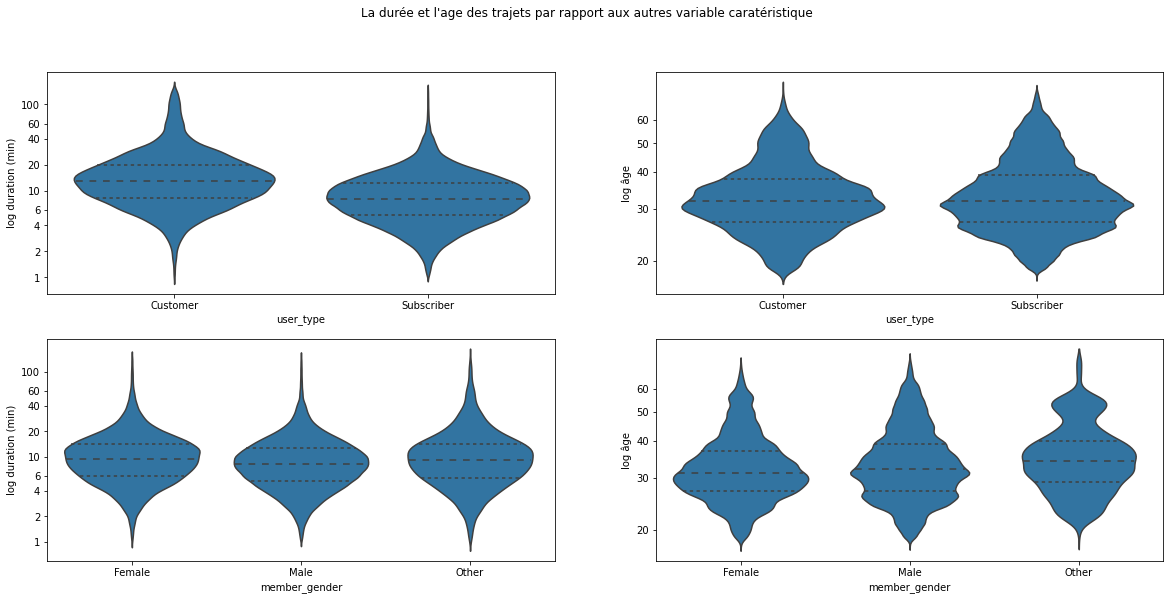

In [18]:
categoric_vars = ['user_type','member_gender']
base_color = sb.color_palette()[0]
fig, ax = plt.subplots(ncols = 2, nrows = len(categoric_vars) , figsize = [20,9])


ylabels = ['{}'.format(i) for i in yticks]
xticks = [20,30,40,50,60]
xlabels = ['{}'.format(i) for i in xticks]

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data=ford_gobike_df, x=var, y='log_duration', color=base_color, inner='quartile', ax=ax[i,0])
    ax[i,0].set_yticks(log_trans(np.array([1,2,4,6,10,20,40,60,100])))
    ax[i,0].set_yticklabels([1,2,4,6,10,20,40,60,100])
    ax[i,0].set_ylabel('log duration (min)')
    
    sb.violinplot(data=ford_gobike_df, x=var, y='log_age', color=base_color, inner='quartile', ax=ax[i,1])
    ax[i,1].set_yticks(log_trans(np.array([20,30,40,50,60])))
    ax[i,1].set_yticklabels([20,30,40,50,60])
    ax[i,1].set_ylabel('log âge')
    
fig.suptitle("La durée et l'age des trajets par rapport aux autres variable caratéristique")    
plt.show()

## La durée et heure des trajets par rapport aux catégories d'âge et les jours de la semaines.

> Les adultes plus des longes trajets les week-ends sur longue période de la journée par rapport aux jeunes.

In [19]:
jeunes = ford_gobike_df[ford_gobike_df['age'] <= 38]
adults = ford_gobike_df[ford_gobike_df['age'] > 38]

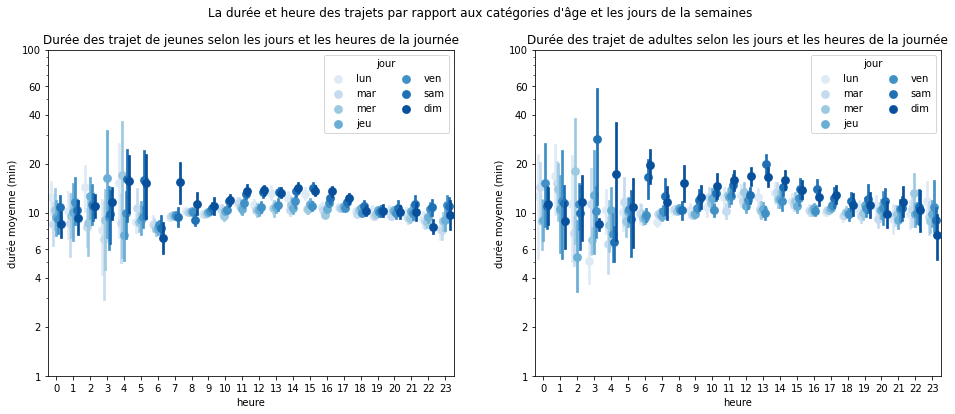

In [20]:
fig, ax = plt.subplots(ncols=2, figsize=[16,6])

sb.pointplot(data=jeunes, x='heure', y='duration_min', hue='jour', linestyles="", palette='Blues', dodge=0.6, ax=ax[0])
ax[0].set_title('Durée des trajet de jeunes selon les jours et les heures de la journée')
ax[0].set_ylabel('durée moyenne (min)')
ax[0].set_yscale('log')
ax[0].legend(ncol = 2,title='jour')
ax[0].set_yticks([1,2,4,6,10,20,40,60,100])
ax[0].set_yticklabels([1,2,4,6,10,20,40,60,100])

sb.pointplot(data=adults, x='heure', y='duration_min', hue='jour', linestyles="", palette='Blues', dodge=0.6, ax=ax[1])
ax[1].set_title('Durée des trajet de adultes selon les jours et les heures de la journée')
ax[1].set_ylabel('durée moyenne (min)')
ax[1].set_yscale('log')
ax[1].legend(ncol = 2,title='jour')
ax[1].set_yticks([1,2,4,6,10,20,40,60,100])
ax[1].set_yticklabels([1,2,4,6,10,20,40,60,100])

fig.suptitle("La durée et heure des trajets par rapport aux catégories d'âge et les jours de la semaines") 
plt.show()

## La durée et jour des trajets par rapport aux catégories d'âge et le type d'utilisateurs.

> Les clientes non abonnées font longtemps plus de trajets que les clients qui sont abonnés. Et nous avons beaucoup plus de jeunes que d'adultes parmi les clients qui ne sont pas abonnés.

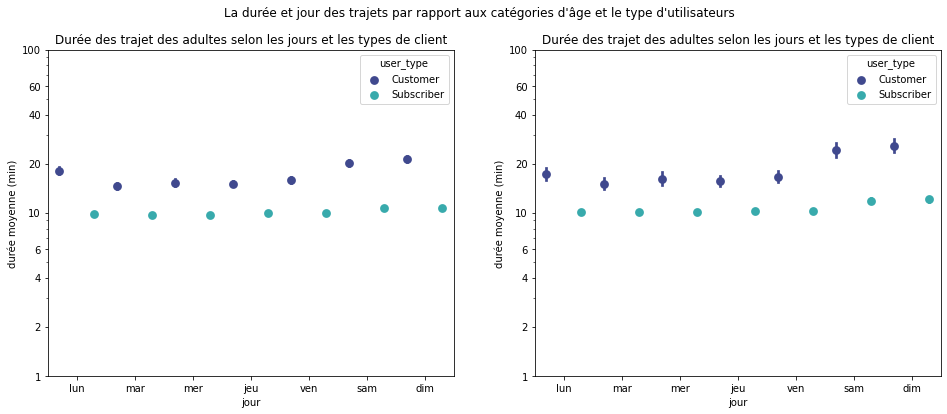

In [21]:
fig, ax = plt.subplots(ncols=2, figsize=[16,6])

sb.pointplot(data=jeunes, x='jour', y='duration_min', hue='user_type', linestyles="", palette='mako', dodge=0.6, ax=ax[0])
ax[0].set_title('Durée des trajet des adultes selon les jours et les types de client')
ax[0].set_ylabel('durée moyenne (min)')
ax[0].set_yscale('log')
ax[0].set_yticks([1,2,4,6,10,20,40,60,100])
ax[0].set_yticklabels([1,2,4,6,10,20,40,60,100])

sb.pointplot(data=adults, x='jour', y='duration_min', hue='user_type', linestyles="", palette='mako', dodge=0.6, ax=ax[1])
ax[1].set_title('Durée des trajet des adultes selon les jours et les types de client')
ax[1].set_ylabel('durée moyenne (min)')
ax[1].set_yscale('log')
ax[1].set_yticks([1,2,4,6,10,20,40,60,100])
ax[1].set_yticklabels([1,2,4,6,10,20,40,60,100])
fig.suptitle("La durée et jour des trajets par rapport aux catégories d'âge et le type d'utilisateurs")
plt.show()

## La durée et jour des trajets par rapport aux catégories d'âge et le genre.

> Il y a plus de femmes jeunes qu'adultes et un tel soit le jour de la semaine, elles effectuent des plus de trajets de longue durée par rapport aux hommes.

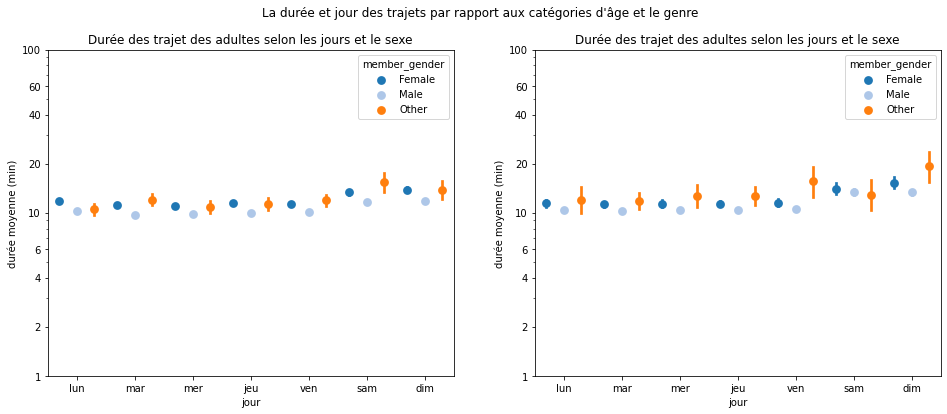

In [22]:
fig, ax = plt.subplots(ncols=2, figsize=[16,6])

sb.pointplot(data=jeunes, x='jour', y='duration_min', hue='member_gender', linestyles="", palette='tab20', dodge=0.6, ax=ax[0])
ax[0].set_title('Durée des trajet des adultes selon les jours et le sexe')
ax[0].set_ylabel('durée moyenne (min)')
ax[0].set_yscale('log')
ax[0].set_yticks([1,2,4,6,10,20,40,60,100])
ax[0].set_yticklabels([1,2,4,6,10,20,40,60,100])

sb.pointplot(data=adults, x='jour', y='duration_min', hue='member_gender', linestyles="", palette='tab20', dodge=0.6, ax=ax[1])
ax[1].set_title('Durée des trajet des adultes selon les jours et le sexe')
ax[1].set_ylabel('durée moyenne (min)')
ax[1].set_yscale('log')
ax[1].set_yticks([1,2,4,6,10,20,40,60,100])
ax[1].set_yticklabels([1,2,4,6,10,20,40,60,100])
fig.suptitle("La durée et jour des trajets par rapport aux catégories d'âge et le genre")
plt.show()

In [23]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 1111895 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Serving local reveal.js
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbc